In [1]:
from fileinput import filename
import numpy as np
from copy import deepcopy
from tkinter import ttk
from tkinter import Entry

import random
import csv
from PIL import Image
from PIL import Image as im
from numpy import asarray
import cv2
import math
import tkinter as tk
from PIL import Image, ImageTk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

In [2]:
root = tk.Tk()
root.title('Decryption')

''

In [3]:
#pip install --upgrade tables

In [4]:
def binaryToDecimal(binary):
 
    decimal, i = 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal

In [5]:
def pol_val(cur_i,subi, N ,x_coord,y_coord,position_values):
    
#     coefficient =np.poly1d( generate_polynomial((t-1)-ni , prime))
#   randVal=(np.polyval(coefficient,subi))%prime
#    tempi=1
#     for i in range(1,ni+1):
#             tempi=(tempi*(subi-i))%prime
#     tempi=(tempi*randVal)%prime
    
    tempix=0
    
    for i in range(0,N):
        tempj=1
        i_val = x_coord[cur_i][i]
        
        for j in range(0,N):
            j_val = y_coord[cur_i][j]
            if i_val!=j_val:
                subi_i=subi-j_val
                i_j=i_val-j_val
                mul=subi_i/i_j
#                 print(subi_i)
#                 print(i_j)
                tempj=(tempj*mul)%257
#                 print(i," ",j," ",subi," ",abs(subi_i)," ",i_j)
        tempix=(tempix+(position_values[cur_i][i]*tempj))%257
    qxi=(tempix)%257
    
    
#     print(qxi,qxj)
    return round(qxi)

In [6]:
def collect_images(N):


    shadow_images = []
    for i in range(0,N+1):
        image = Image.open("ShadowImage"+str(i)+".png")
        numpydata = np.asarray(image)
        shadow_images.append(deepcopy(numpydata))
        print("For ",i," ",numpydata.shape)
    
    return shadow_images

In [7]:
def check_writable(img):
    for i in img:
        print("flag value")
        i.setflags(write=1)
        print(i.flags)

In [8]:
def calculate_positions(m1,m2,N,shadow_images):
    position_values = []
    x_coord = []
    y_coord = []

    for i in range(0,m1): 
        for k in range(0,m2):
            pos_i = []
            x = []
            y = []
            for j in range(1,N+1):
                pos_i.append(int(shadow_images[j][i][k])^int(shadow_images[0][i][k]))
                x.append(j)
                y.append(j)

            position_values.append(pos_i)
            x_coord.append(x)
            y_coord.append(y)
    return position_values , x_coord,y_coord

In [9]:
def data_embed(m1,m2,N,shadow_images,text):
    secret_text =""
    str_sectxt = ""
    print('writing the text')
    #check_writable(shadow_images)
    
    for i in range(0,len(text)):
        img_number = (i%N )+1
        position = i%(m1*m2)
        bit_position = i % 8
        position_x = position // m2
        position_y = position % m2
        numpydata=[]
        
#         image = Image.open('ShadowImage'+str(img_number)+'.png')
#         numpydata = np.asarray(image)
#         numpydata=numpydata.astype(int)
        
        numpydata = list(shadow_images[img_number])
        
        positionval = format(numpydata[position_x][position_y],'08b')
        print("for ith bit", i, " " , positionval)
        var_int = int(text[i])
        position_int = int(positionval[bit_position])
        original_bit = var_int ^ position_int
        
        secret_text = secret_text + positionval[bit_position] 
        if(len(secret_text) == 8):
            #print((secret_text))
            str_sectxt = str_sectxt + chr(binaryToDecimal(int(secret_text)))
            secret_text = ""
            
            
        
        pos_var = (positionval[0:bit_position])+ str(original_bit)
       
        
        if(bit_position != 7):
            pos_var = str(pos_var) + positionval[bit_position+1:]
        #positionval[-bit_position] = var[i]
        numpydata[position_x][position_y] = binaryToDecimal(int(pos_var))
#        shadow_images[img_number][position_x][position_y] = int(pos_var)
        shadow_images[img_number] = numpydata
    
        print("for i ",i,"ith bit " , img_number , "pos x" ,position_x , "pos y", position_y ,"bit pos",bit_position )
        print(numpydata[position_x][position_y])
    
    print(secret_text)
    print(str_sectxt)
    return str_sectxt,shadow_images

In [10]:
def compare_graph():
    root = tk.Tk()
    root.title("Comparison Graph")

        # Create the data for the bar graph
    values = ((12.51379776, 22.21923351, 555.0608945,3500.766534,7474.277385,21743.27633),
                  (0.5433523655, 0.6773436069, 0.7639570236,1.057267904,1.540297747,3.92463541))
    X = np.arange(6)

        # Create a Matplotlib figure and axis
    fig = Figure(figsize=(8, 8), dpi=100)
    ax = fig.add_subplot(1,1,1)



    ax.plot(X,values[0],label='Base paper')


    ax.plot(X,values[1],label='Novelty')
    ax.set_xticklabels(['0', '25*25','50*50','100*100','150*150','200*200','256*256'])


        # Add labels and a legend
    ax.set_xlabel('Image size(in pixels)')
    ax.set_ylabel('Exceution Time(in seconds)')
    ax.set_title('Comparison Graph')
    ax.legend()

    ax.set_yscale('log')
    #rows = []

    # for i in range(6):
    #     cols = []
    #     for j in range(2):
    #         e = Entry(relief=tk.GROOVE)
    #         e.grid(row=i, column=j, sticky=tk.NSEW)
    #         e.insert(tk.END, '%d' % (values[0][i]))
    #         cols.append(e)
    #     rows.append(cols)

    newWindow = tk.Toplevel(root)
    newWindow.title("table Window")
    newWindow.geometry("800x500") 
    tk.Label(newWindow,text ="EXECUTION TIME - COMPARISON").pack()
    s = ttk.Style()
    s.theme_use('clam')
    s.configure('Treeview',rowheight = 50,font=('Helvetica',16))

    #table = tk.Frame(newWindow)

    t=ttk.Treeview(newWindow,height=7)
    t['columns']= ('Image size','base paper','novelty')

    t.column("#0", width=0,  stretch=tk.NO)
    t.column("Image size",anchor=tk.CENTER, width=150)
    t.column("base paper",anchor=tk.CENTER,width=150)
    t.column("novelty",anchor=tk.CENTER,width=150)

    t.heading("#0",text="",anchor=tk.CENTER)
    t.heading("Image size",text="Image size",anchor=tk.CENTER)
    t.heading("base paper",text="base paper (in secs)",anchor=tk.CENTER)
    t.heading("novelty",text="novelty(in secs)",anchor=tk.CENTER)



    t.insert(parent = '' , index='end',iid=0,text='',values=('25*25',values[0][0],values[1][0]))
    t.insert(parent = '' , index='end',iid=1,text='',values=('50*50',values[0][1],values[1][1]))
    t.insert(parent = '' , index='end',iid=2,text='',values=('100*100',values[0][2],values[1][2]))
    t.insert(parent = '' , index='end',iid=3,text='',values=('150*150',values[0][3],values[1][3]))
    t.insert(parent = '' , index='end',iid=4,text='',values=('200*200',values[0][4],values[1][4]))
    t.insert(parent = '' , index='end',iid=5,text='',values=('256*256',values[0][5],values[1][5]))



    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()
    #table.pack()
    t.pack()

    root.mainloop()

In [11]:
def decrypt():
    
    
    N=0
    m1=0
    m2=0
    b=0
    
    with open("Nandm1andm2.txt","r") as f:
        f.readline()
        attr=f.readline().split(",")
        N=int(attr[0])
        m1=int(attr[1])
        m2=int(attr[2])
        b=int(attr[3])
        text = attr[4]
    
    shadow_images = collect_images(N)
    
        
#         text = text + str((position_int)^(var_int))
        
        
#         data=im.fromarray(np.array(numpydata).astype(np.uint8))
#         data.save('ShadowImage'+str(img_number)+'.png')
#         print("for i ",i,"ith bit " , img_number , "pos x" ,position_x , "pos y", position_y ,"bit pos",bit_position )
    
    
    viewShadowImages(shadow_images,N)  

    Original_image=[]
    if(b>0):
        ori_array_r=[]
        ori_array_g=[]
        ori_array_b=[]

        shad_r=[]
        shad_g=[]
        shad_b=[]
        for i in range(0,N+1):
            shad_r.append(0)
            shad_g.append(0)
            shad_b.append(0)
            shad_b[i],shad_g[i],shad_r[i]=cv2.split(shadow_images[i])
#         for i in range(1,N+1):
#             ori_array_r=[*ori_array_r,*(shad_r[i]^shad_r[i-1])]
#             ori_array_g=[*ori_array_g,*(shad_g[i]^shad_g[i-1])]
#             ori_array_b=[*ori_array_b,*(shad_b[i]^shad_b[i-1])]
    #     print(len(ori_array_r))
        
        #str_sectxt =''
        
        str_sectxt ,shad_b = data_embed(m1,m2,N,shad_b,text)
        print("shadow imag r " , list(shad_r))
        
        position_valuesR,x_coordR,y_coordR = calculate_positions(m1,m2,N,shad_r)
        
        position_valuesG,x_coordG,y_coordG = calculate_positions(m1,m2,N,shad_g)
        position_valuesB,x_coordB,y_coordB = calculate_positions(m1,m2,N,shad_b)
        
        for i in range(1,N+1):
            col = 0
            Img = []

            #print(">>>>For ",i,"th n value<<<<")
            for j in range(0,m1):
                I_row =[]
                for k in range(0,m2):
                    qxr = pol_val(((j*m2)+k),i,N , x_coordR,y_coordR,position_valuesR)
                    qxg = pol_val(((j*m2)+k),i,N , x_coordG,y_coordG,position_valuesG)
                    qxb = pol_val(((j*m2)+k),i,N , x_coordB,y_coordB,position_valuesB)

                    I_row.append([qxr,qxg,qxb])
                Img.append(I_row)

            Original_image=[*Original_image,*Img]

        data=im.fromarray(np.array(Original_image).astype(np.uint8))
        data.save('DecryptedImage.png')
        
    else :
        str_sectxt ,shadow_images = data_embed(m1,m2,N,shadow_images,text)
        position_values,x_coord,y_coord = calculate_positions(m1,m2,N,shadow_images)
        
        
        for i in range(1,N+1):
            col = 0
            Img = []

            #print(">>>>For ",i,"th n value<<<<")
            for j in range(0,m1):
                I_row =[]
                for k in range(0,m2):
                    qxi = pol_val(((j*m2)+k),i,N , x_coord,y_coord,position_values)

                    I_row.append(round(qxi))
                Img.append(I_row)

            Original_image=[*Original_image,*Img]
        
        data=im.fromarray(np.array(Original_image).astype(np.uint8))
        data.save('DecryptedImage.png')
      
        
    img2 = Image.open('DecryptedImage.png')
    img2 = img2.resize((300, 300))
    img2 = ImageTk.PhotoImage(img2)
    img_label2 = tk.Label(image=img2)
    img_label2.image = img2
    img_label2.grid(column=1, row=2)
    
    root.title("DECRYPTION")
    tk.Label(root,text="THE SECRET TEXT IS:",font = ('Helvetica', 18, 'bold')).grid(column= 1 ,row=6,  ipadx = 15 , ipady  = 5)
    inputtxt = tk.Label(root,text=str_sectxt,font = ('Helvetica', 15))
#     inputtxt.insert(0,str_sectxt)
    inputtxt.grid(column = 2 , row = 6 , ipadx = 15 , ipady = 5 , padx= 0)
    window_btn = tk.Button(root,text ="COMPARE",command = lambda: compare_graph(),font=("Raleway", 13), bg="#000000", fg="white", height=2, width=30)
    window_btn.grid(column =1,row=7)
    
#     print(position_values)
#     print(x_coord)
#     print(y_coord)
    

In [12]:
def viewShadowImages(shadow_images,N):
    newWindow = tk.Toplevel(root)
 
    # sets the title of the
    # Toplevel widget
    newWindow.title("Shadow Image Window - Decryption End")

    # sets the geometry of toplevel
    newWindow.geometry("1200x300")
 
    # A Label widget to show in toplevel
    tk.Label(newWindow,text ="Shadow Images").pack()
    
    fig = plt.figure(figsize=(15,10))
    row = math.ceil(N / 3)
    column = 3
    
    for i in range(1,N+1):
        fig.add_subplot(row,column,i)
        image = cv2.imread('ShadowImage'+str(i)+'.png')
        plt.imshow(image)
        plt.axis('off')
        plt.title('ShadowImage'+str(i))
    
    canvas = FigureCanvasTkAgg(fig,master = newWindow)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas,newWindow)
    toolbar.update()
    canvas.get_tk_widget().pack()
    
    newWindow.state('zoomed')

In [13]:
button_text = tk.StringVar()
send_btn_text = tk.StringVar()
root.title("DECRYPTION")
send_btn = tk.Button(root, textvariable=send_btn_text, command=lambda: decrypt(),
                     font=("Raleway", 13), bg="#000000", fg="white", height=2, width=12)
send_btn_text.set("decrypt")
send_btn.grid(column=1, row=0)

For  0   (30, 150)
For  1   (30, 150)
For  2   (30, 150)
For  3   (30, 150)
For  4   (30, 150)
For  5   (30, 150)
writing the text
for ith bit 0   01000101
for i  0 ith bit  1 pos x 0 pos y 0 bit pos 0
69
for ith bit 1   11101101
for i  1 ith bit  2 pos x 0 pos y 1 bit pos 1
237
for ith bit 2   11100011
for i  2 ith bit  3 pos x 0 pos y 2 bit pos 2
227
for ith bit 3   11011101
for i  3 ith bit  4 pos x 0 pos y 3 bit pos 3
221
for ith bit 4   11000100
for i  4 ith bit  5 pos x 0 pos y 4 bit pos 4
196
for ith bit 5   10001011
for i  5 ith bit  1 pos x 0 pos y 5 bit pos 5
139
for ith bit 6   10110011
for i  6 ith bit  2 pos x 0 pos y 6 bit pos 6
179
for ith bit 7   11010111
for i  7 ith bit  3 pos x 0 pos y 7 bit pos 7
214
for ith bit 8   00101110
for i  8 ith bit  4 pos x 0 pos y 8 bit pos 0
46
for ith bit 9   01110010
for i  9 ith bit  5 pos x 0 pos y 9 bit pos 1
50
for ith bit 10   00101001
for i  10 ith bit  1 pos x 0 pos y 10 bit pos 2
41
for ith bit 11   10001110
for i  11 ith bit  

C:\Users\Admin\AppData\Local\Temp\ipykernel_20716\948685622.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '25*25','50*50','100*100','150*150','200*200','256*256'])


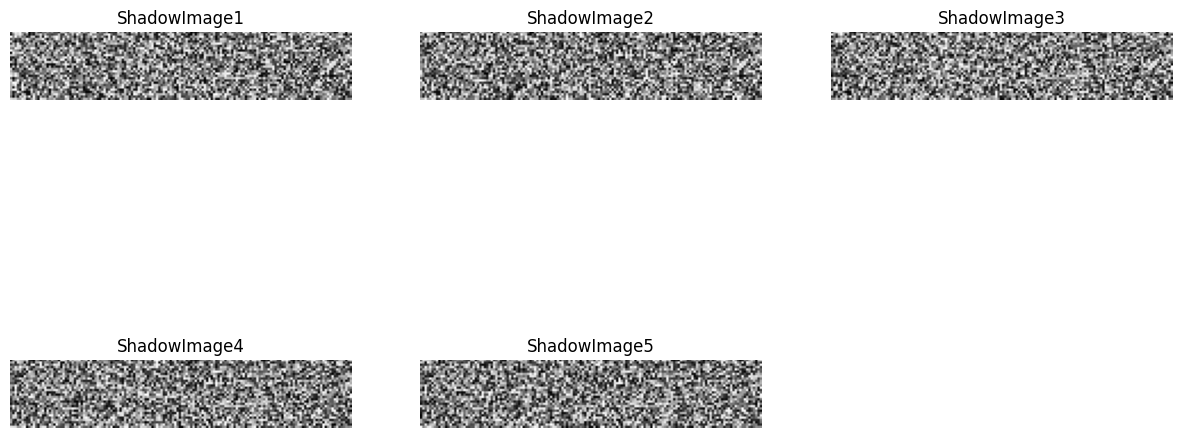

In [14]:
canvas = tk.Canvas(root, width=600, height=300)
canvas.grid(columnspan=3, rowspan=3)

root.mainloop()